# Comparing features between timepoint samples

The data contains three biological replicates per timepoint. Ideally, these replicates have very similar feature values as they have received an identical treatment.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# %load common_.py
from common import *

In [4]:
from ehv import load

In [5]:
df = load.load_raw_ideas_dir(
    Path("/data/weizmann/EhV/high_time_res"), 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/representations/ideas_features/"), 
    "ALL", 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/cell_populations/manual_gating/"))
df = load.remove_unwanted_features(df)
df = load.tag_columns(df)
df = load.clean_column_names(df)

In [8]:
df = df[df["meta_label_coi"]]

In [9]:
df.head()

,meta_object_number,feat_area_m01,feat_area_m03,feat_area_m04,feat_area_m06,feat_area_m07,feat_area_m09,feat_area_m11,feat_area_mc,feat_aspect_ratio_m01,...,feat_intensity_m02_ch02,feat_similarity_m01_ch02_ch03,meta_timepoint,meta_replicate,meta_group,meta_label_coi,meta_label_mcp_neg_psba_pos,meta_label_mcp_pos_psba_pos,meta_label_mcp_pos_psba_neg,meta_label_mcp_neg_psba_neg
6,6,38.333332,0.000000,0.0,12.000000,20.222221,40.777779,35.111111,51.111111,0.426284,...,0.000000,0.879332,0,R1,Ctrl,True,True,False,False,False
15,15,24.333334,0.000000,0.0,24.333334,19.222221,29.111111,34.222221,42.333332,0.919688,...,0.000000,1.001929,0,R1,Ctrl,True,True,False,False,False
16,16,33.111111,3.666667,0.0,11.555555,23.555555,29.666666,19.222221,33.222221,0.944940,...,217.214279,1.373776,0,R1,Ctrl,True,True,False,False,False
18,18,28.111111,4.666667,0.0,9.444445,17.555555,24.222221,19.777779,29.666666,0.942328,...,256.833344,0.968074,0,R1,Ctrl,True,True,False,False,False
21,21,29.666666,0.000000,0.0,12.555555,20.111111,25.555555,23.444445,30.888889,0.928602,...,251.892853,1.232937,0,R1,Ctrl,True,True,False,False,False


## Median and MAD for comparing feature values

We use the median and median absolute deviation as robust measures for characterizing feature distributions.

In [10]:
# compute stats over all cells in a timepoint
tp_level_stats = df.groupby(["meta_group", "meta_timepoint"])[df.filter(regex="feat").columns].agg(["median", "mad"])

In [11]:
# compute median over all cells in a replicate
rep_level_stats = df.groupby(["meta_group", "meta_timepoint", "meta_replicate"])[df.filter(regex="feat").columns].agg("median")

In [12]:
# expand tp_level_stats such that it becomes compatible with rep_level_stats
expanded_tp_level_stats = pandas.DataFrame(index=rep_level_stats.index, columns=tp_level_stats.columns)
for idx, row in tp_level_stats.iterrows():
    expanded_tp_level_stats.loc[(idx[0], idx[1])] = numpy.repeat(row.to_frame().T.values, len(expanded_tp_level_stats.loc[(idx[0], idx[1])]), axis=0)
expanded_tp_level_stats

feat_area_m01             \
                                                median        mad   
meta_group meta_timepoint meta_replicate                            
Ctrl       0              R1                 30.444445   8.052081   
                          R2                 30.444445   8.052081   
                          R3                 30.444445   8.052081   
           3              R1                 36.888889  33.838028   
                          R2                 36.888889  33.838028   
...                                                ...        ...   
Low        15             R2                 40.777779  17.379843   
                          R3                 40.777779  17.379843   
           16             R1                 43.888889  16.520927   
                          R2                 43.888889  16.520927   
                          R3                 43.888889  16.520927   

                                         feat_area_m03            \
                                                median       mad   
meta_group meta_timepoint meta_replicate                           
Ctrl       0              R1                       0.0  3.465379   
                          R2                       0.0  3.465379   
                          R3                       0.0  3.465379   
           3              R1                  7.444445  4.005329   
                          R2                  7.444445  4.005329   
...                                                ...       ...   
Low        15             R2                 11.111111  8.478171   
                          R3                 11.111111  8.478171   
           16             R1                 10.222222  9.346665   
                          R2                 10.222222  9.346665   
                          R3                 10.222222  9.346665   

                                         feat_area_m04             \
                                                median        mad   
meta_group meta_timepoint meta_replicate                            
Ctrl       0              R1                       0.0   0.170785   
                          R2                       0.0   0.170785   
                          R3                       0.0   0.170785   
           3              R1                       0.0   0.059566   
                          R2                       0.0   0.059566   
...                                                ...        ...   
Low        15             R2                 17.444445  12.482642   
                          R3                 17.444445  12.482642   
           16             R1                 10.222222  11.815638   
                          R2                 10.222222  11.815638   
                          R3                 10.222222  11.815638   

                                         feat_area_m06             \
                                                median        mad   
meta_group meta_timepoint meta_replicate                            
Ctrl       0              R1                 17.555555   6.711981   
                          R2                 17.555555   6.711981   
                          R3                 17.555555   6.711981   
           3              R1                 19.111111  12.759172   
                          R2                 19.111111  12.759172   
...                                                ...        ...   
Low        15             R2                 24.666666  10.368266   
                          R3                 24.666666  10.368266   
           16             R1                 27.666666   10.99062   
                          R2                 27.666666   10.99062   
                          R3                 27.666666   10.99062   

                                         feat_area_m07             ...  \
                                                median        mad  ...   
meta_group meta_timepoint meta_replicat

## Finding replicate level features with deviating values

We select those features for which the replicate level median value does not fall in the timepoint level [median - mad, median + mad] interval.

In [13]:
outlier_features = pandas.DataFrame(index=rep_level_stats.index)
for col in df.filter(regex="feat"):
    left = expanded_tp_level_stats[col]["median"] - expanded_tp_level_stats[col]["mad"]
    right = expanded_tp_level_stats[col]["median"] + expanded_tp_level_stats[col]["mad"]
    outlier_features[col] = ~rep_level_stats[col].between(left, right, inclusive=True)

### Looking at which samples deviate often

In [14]:
outlier_features[outlier_features.any(axis=1)].sum(axis=1).sort_values(ascending=False)

meta_group  meta_timepoint  meta_replicate
High        16              R1                31
Low         14              R1                29
High        13              R2                26
Low         15              R1                25
High        13              R3                24
            16              R2                19
            12              R3                17
Low         14              R2                15
            0               R1                14
Ctrl        7               R3                14
Low         1               R1                13
            6               R3                12
            13              R1                12
Ctrl        5               R3                12
Low         0               R2                11
High        1               R1                11
            14              R1                11
Ctrl        5               R2                11
            6               R1                11
            5             

This list shows the samples which have the highest number of deviating features. For example, replicate 1 from timepoint 16 in group High has 31 flagged features.

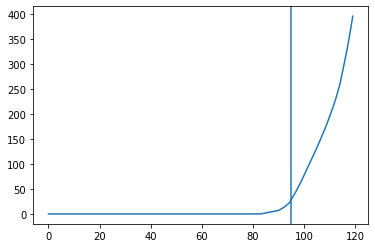

In [15]:
ax = outlier_features.sum(axis=1).sort_values().cumsum().reset_index()[0].plot()
ax.axvline(95)

In [16]:
outlier_features.sum(axis=1).sort_values(ascending=False)[:25]

meta_group  meta_timepoint  meta_replicate
High        16              R1                31
Low         14              R1                29
High        13              R2                26
Low         15              R1                25
High        13              R3                24
            16              R2                19
            12              R3                17
Low         14              R2                15
Ctrl        7               R3                14
Low         0               R1                14
            1               R1                13
            13              R1                12
Ctrl        5               R3                12
Low         6               R3                12
Ctrl        6               R1                11
Low         0               R2                11
Ctrl        5               R1                11
High        1               R1                11
            14              R1                11
Ctrl        5             

There is a knee point at 95. Meaning we would throw away 25 samples. As expected these are all samples from late timepoints of 12 and above, except for some control samples and samples some intermeidate Low samples. 

In [17]:
selected_samples = outlier_features.sum(axis=1).sort_values()[:95].index
selected_samples

MultiIndex([('Ctrl',  0, 'R1'),
            ( 'Low',  3, 'R3'),
            ( 'Low',  3, 'R2'),
            ( 'Low',  2, 'R3'),
            ( 'Low',  2, 'R2'),
            ( 'Low',  2, 'R1'),
            ( 'Low',  1, 'R2'),
            ( 'Low',  0, 'R3'),
            ('High', 16, 'R3'),
            ('High', 14, 'R3'),
            ( 'Low',  4, 'R2'),
            ('High', 14, 'R2'),
            ( 'Low', 16, 'R2'),
            ('High', 12, 'R2'),
            ('High', 12, 'R1'),
            ('High', 11, 'R2'),
            ('High', 11, 'R1'),
            ('High',  9, 'R3'),
            ('High',  9, 'R2'),
            ('High',  9, 'R1'),
            ('High',  8, 'R2'),
            ('High', 13, 'R1'),
            ('High',  8, 'R1'),
            ( 'Low',  4, 'R3'),
            ( 'Low',  5, 'R2'),
            ( 'Low', 15, 'R3'),
            ( 'Low', 15, 'R2'),
            ( 'Low', 14, 'R3'),
            ( 'Low', 13, 'R3'),
            ( 'Low', 13, 'R2'),
            ( 'Low', 12, 'R3'),
        

In [18]:
selected_samples.to_frame().to_csv("data/selected_samples.csv", index=False)

### Looking at which features deviate often

In [19]:
outlier_features_filtered = outlier_features.loc[selected_samples]

In [20]:
outlier_features_filtered[outlier_features_filtered.any(axis=1)].sum(axis=0).sort_values(ascending=False)

feat_max_pixel_mc_ch7            7
feat_mean_pixel_m07_ch7          2
feat_intensity_m02_ch02          2
feat_max_pixel_m02_ch02          2
feat_gradient_rms_m04_ch04       1
                                ..
feat_contrast_m07_ch7            0
feat_contrast_m06_ssc            0
feat_contrast_m04_ch04           0
feat_contrast_m03_ch03           0
feat_similarity_m01_ch02_ch03    0
Length: 102, dtype: int64

This list contains the number of times a feature was selected as outlier in a sample. So feat_Max Pixel_MC_Ch7 was deviating significantly from the timepoint median for 7 samples (from the 95 remaining ones).

In [23]:
outlier_features_filtered[outlier_features_filtered["feat_max_pixel_mc_ch7"]]

feat_area_m01  feat_area_m03  \
meta_group meta_timepoint meta_replicate                                 
Low        12             R1                      False          False   
           11             R1                      False          False   
Ctrl       6              R3                      False          False   
High       8              R3                      False          False   
           0              R3                      False          False   
           11             R3                      False          False   
Low        1              R3                      False          False   

                                          feat_area_m04  feat_area_m06  \
meta_group meta_timepoint meta_replicate                                 
Low        12             R1                      False          False   
           11             R1                      False          False   
Ctrl       6              R3                      False          False   
High       8              R3                      False          False   
           0              R3                      False          False   
           11             R3                      False          False   
Low        1              R3                      False          False   

                                          feat_area_m07  feat_area_m09  \
meta_group meta_timepoint meta_replicate                                 
Low        12             R1                      False          False   
           11             R1                      False          False   
Ctrl       6              R3                      False          False   
High       8              R3                      False          False   
           0              R3                      False          False   
           11             R3                      False          False   
Low        1              R3                      False          False   

                                          feat_area_m11  feat_area_mc  \
meta_group meta_timepoint meta_replicate                                
Low        12             R1                      False         False   
           11             R1                      False         False   
Ctrl       6              R3                      False         False   
High       8              R3                      False         False   
           0              R3                      False         False   
           11             R3                      False         False   
Low        1              R3                      False         False   

                                          feat_aspect_ratio_m01  \
meta_group meta_timepoint meta_replicate                          
Low        12             R1                              False   
           11             R1                              False   
Ctrl       6              R3                              False   
High       8              R3                              False   
           0              R3                              False   
           11             R3                              False   
Low        1              R3                              False   

                                          feat_aspect_ratio_m03  ...  \
meta_group meta_timepoint meta_replicate                         ...   
Low        12             R1                              False  ...   
           11             R1                              False  ...   
Ctrl       6              R3                              False  ...   
High       8              R3                              False  ...   
           0              R3                              False  ...   
           11             R3                              False  ...   
Low        1              R3                              False  ...   

                                          feat_bright_detail_intensity_r3_mc_bf  \
meta_group meta_timepoint meta_replicate       

<AxesSubplot:xlabel='meta_timepoint', ylabel='feat_max_pixel_mc_ch7'>

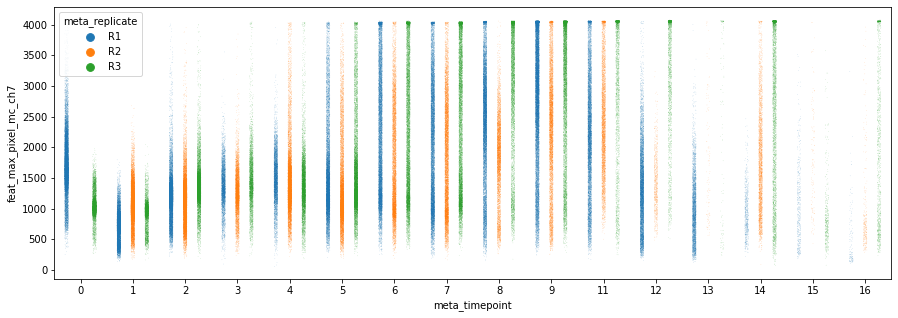

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
seaborn.stripplot(data=df[df["meta_group"] == "High"], y="feat_max_pixel_mc_ch7", x="meta_timepoint", hue="meta_replicate", dodge=True, s=0.5, alpha=0.5, ax=ax)

<AxesSubplot:xlabel='meta_timepoint', ylabel='feat_max_pixel_mc_ch7'>

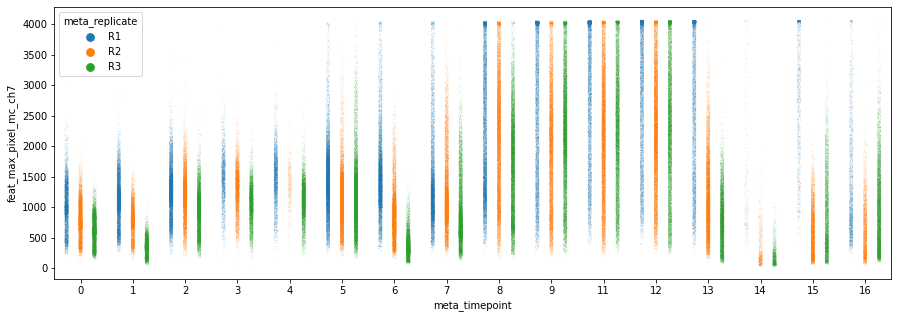

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
seaborn.stripplot(data=df[df["meta_group"] == "Low"], y="feat_max_pixel_mc_ch7", x="meta_timepoint", hue="meta_replicate", dodge=True, s=0.5, alpha=0.5, ax=ax)

<AxesSubplot:xlabel='meta_timepoint', ylabel='feat_max_pixel_mc_ch7'>

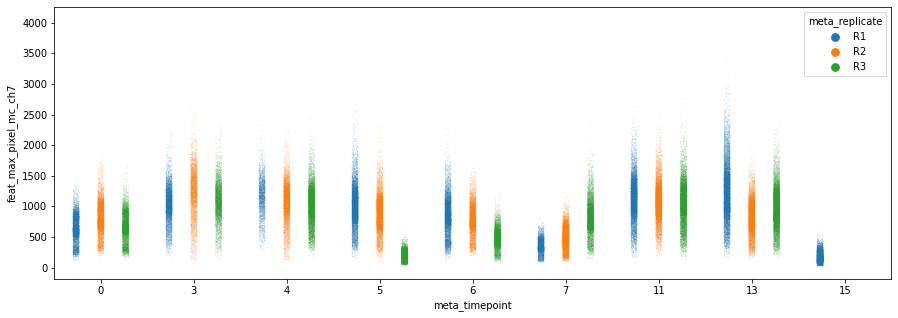

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
seaborn.stripplot(data=df[df["meta_group"] == "Ctrl"], y="feat_max_pixel_mc_ch7", x="meta_timepoint", hue="meta_replicate", dodge=True, s=0.5, alpha=0.5, ax=ax)

In [27]:
outlier_features_filtered.columns[~outlier_features_filtered.any(axis=0)]

Index(['feat_area_m01', 'feat_area_m03', 'feat_area_m04', 'feat_area_m06',
       'feat_area_m07', 'feat_area_m09', 'feat_area_m11', 'feat_area_mc',
       'feat_aspect_ratio_m01', 'feat_aspect_ratio_m03',
       'feat_aspect_ratio_m06', 'feat_aspect_ratio_m07',
       'feat_aspect_ratio_m09', 'feat_aspect_ratio_m11',
       'feat_aspect_ratio_intensity_m01_bf',
       'feat_aspect_ratio_intensity_m03_ch03',
       'feat_aspect_ratio_intensity_m06_ssc',
       'feat_aspect_ratio_intensity_m07_ch7',
       'feat_aspect_ratio_intensity_m09_bf2',
       'feat_aspect_ratio_intensity_m11_ch11', 'feat_modulation_m01_bf',
       'feat_modulation_m03_ch03', 'feat_modulation_m04_ch04',
       'feat_modulation_m07_ch7', 'feat_modulation_m09_bf2',
       'feat_modulation_m11_ch11', 'feat_contrast_m01_bf',
       'feat_contrast_m03_ch03', 'feat_contrast_m04_ch04',
       'feat_contrast_m06_ssc', 'feat_contrast_m07_ch7',
       'feat_contrast_m09_bf2', 'feat_contrast_m11_ch11',
       'feat_gradien

90 features do not have any deviating values for any samples.

<AxesSubplot:>

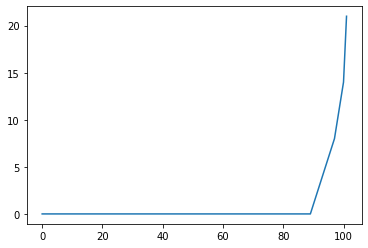

In [28]:
outlier_features_filtered.sum(axis=0).sort_values().cumsum().reset_index()[0].plot()

We choose to keep the 90 features.

In [29]:
selected_features = outlier_features_filtered.columns[~outlier_features_filtered.any(axis=0)]

In [30]:
with open("data/selected_features.txt", "w") as fh:
    fh.write(",".join(selected_features.values))